# Energy Efficiency Predictions


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('https://github.com/JielingChen/building_energy_efficiency_prediction/raw/main/ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height', 'orientation', 
                'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
print(data['orientation'].value_counts())
print(data['glazing_area_distribution'].value_counts())

2    192
3    192
4    192
5    192
Name: orientation, dtype: int64
1    144
2    144
3    144
4    144
5    144
0     48
Name: glazing_area_distribution, dtype: int64


In [6]:
# change the data type to category
data['orientation'] = data['orientation'].astype('category')
data['glazing_area_distribution'] = data['glazing_area_distribution'].astype('category')

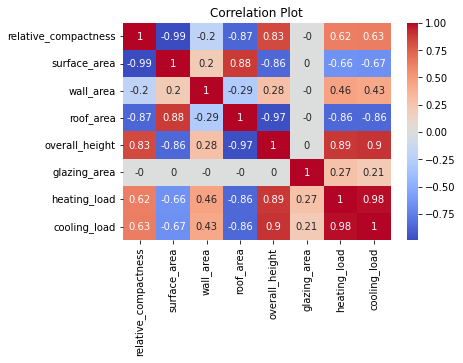

In [7]:
# check correlation between variables
corr = data.corr().round(2)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Plot')
plt.show()

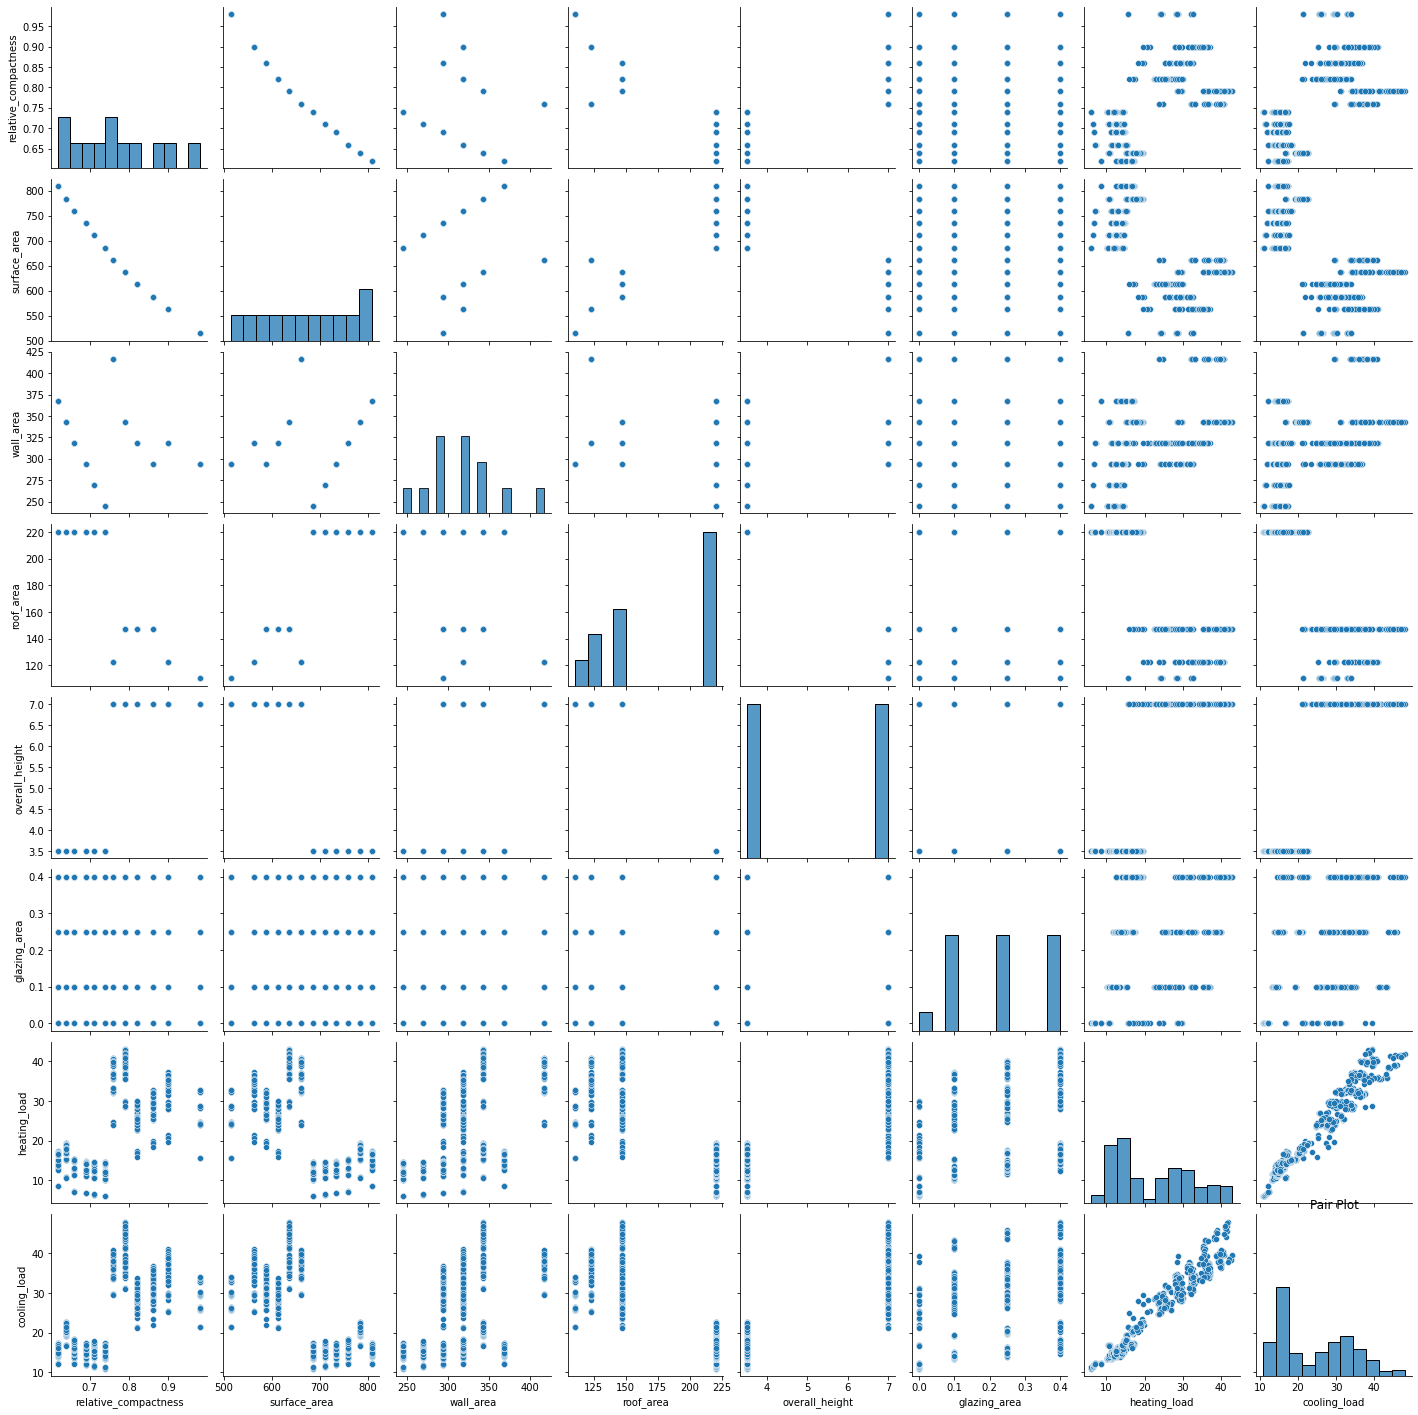

In [8]:
# check the distribution and relationship between variables
sns.pairplot(data)
plt.title('Pair Plot')
plt.show()

In [9]:
# drop surface_area
data.drop(['surface_area'], axis=1, inplace=True)

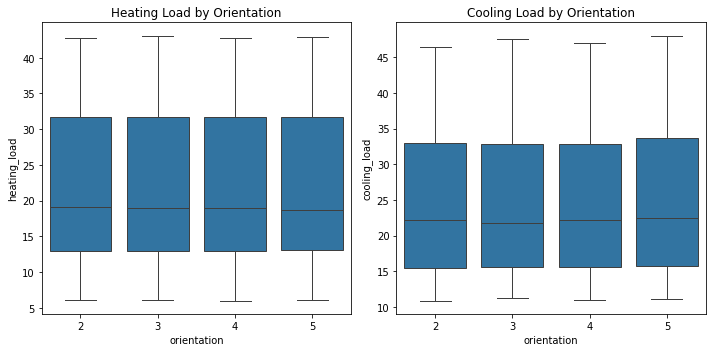

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether orientation has an impact on heating_load
sns.boxplot(data=data, x='orientation', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Orientation')

# check whether orientation has an impact on cooling_load
sns.boxplot(data=data, x='orientation', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Orientation')

plt.tight_layout()
plt.show()

In [11]:
# drop orientation to reduce dimensionality
data = data.drop('orientation', axis=1)

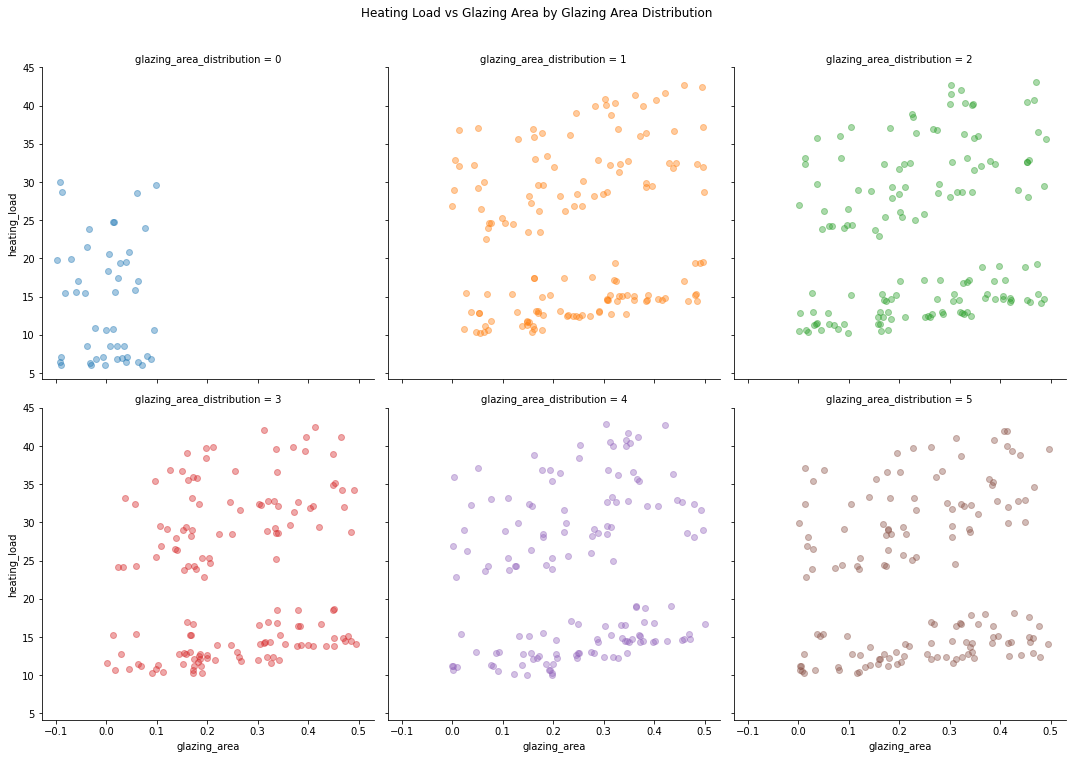

In [12]:
# check whether the glazing_area_distribution has an impact on the relationship between glazing_are and heating_load
lmplot = sns.lmplot(data=data, x='glazing_area', y='heating_load', hue='glazing_area_distribution', 
           fit_reg=False, scatter_kws={'alpha':0.4}, x_jitter=0.1, y_jitter=0.1,
           col='glazing_area_distribution', col_wrap=3)
lmplot.fig.suptitle('Heating Load vs Glazing Area by Glazing Area Distribution', y=1.05)
plt.show()

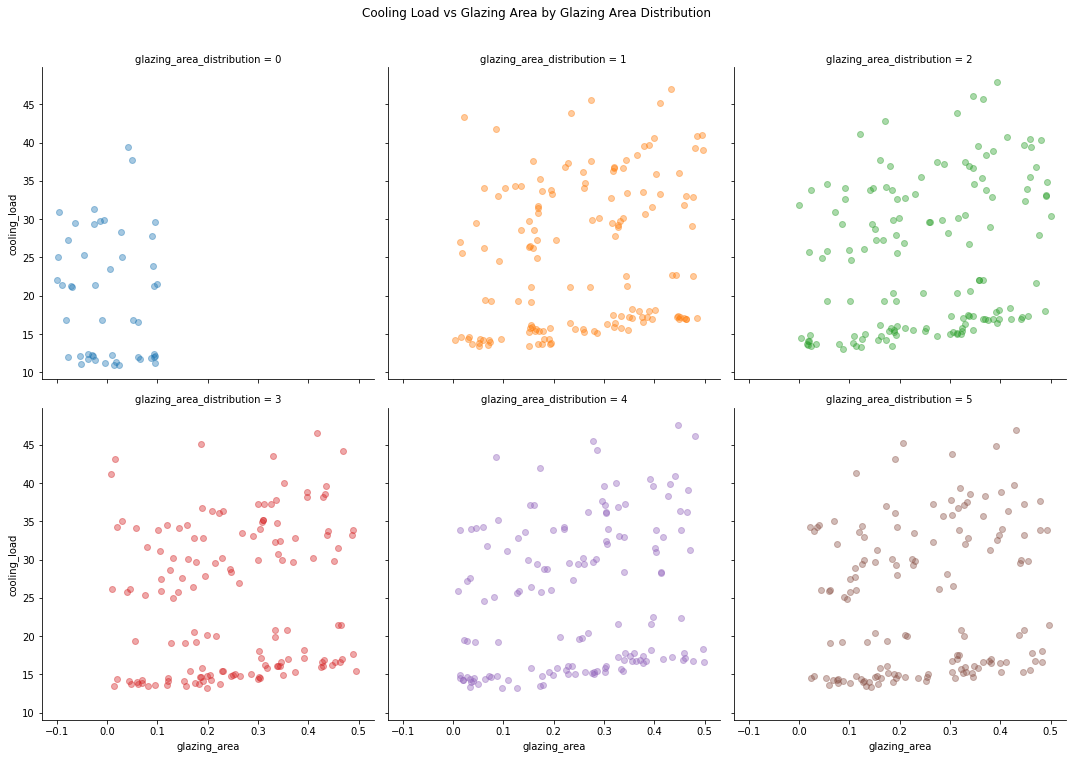

In [13]:
# check whether the glazing_area_distribution has an impact on the relationship between glazing_are and cooling_load
lmplot = sns.lmplot(data=data, x='glazing_area', y='cooling_load', hue='glazing_area_distribution', 
           fit_reg=False, scatter_kws={'alpha':0.4}, x_jitter=0.1, y_jitter=0.1,
           col='glazing_area_distribution', col_wrap=3)
lmplot.fig.suptitle('Cooling Load vs Glazing Area by Glazing Area Distribution', y=1.05)
plt.show()

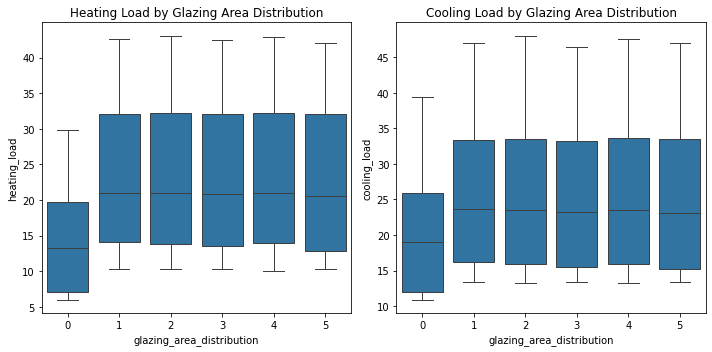

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether glazing_area_distribution has an impact on heating_load
sns.boxplot(data=data, x='glazing_area_distribution', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Glazing Area Distribution')

# check whether glazing_area_distribution has an impact on cooling_load
sns.boxplot(data=data, x='glazing_area_distribution', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing Area Distribution')

plt.tight_layout()
plt.show()

In [15]:
# change glazing_area_distribution to binary variable to reduce dimensionality
data['glazing_area_distribution'] = data['glazing_area_distribution'].replace({0:0, 1:1, 2:1, 3:1, 4:1, 5:1})
data['glazing_area_distribution'] = data['glazing_area_distribution'].astype('category')
data['glazing_area_distribution'].value_counts()

1    720
0     48
Name: glazing_area_distribution, dtype: int64

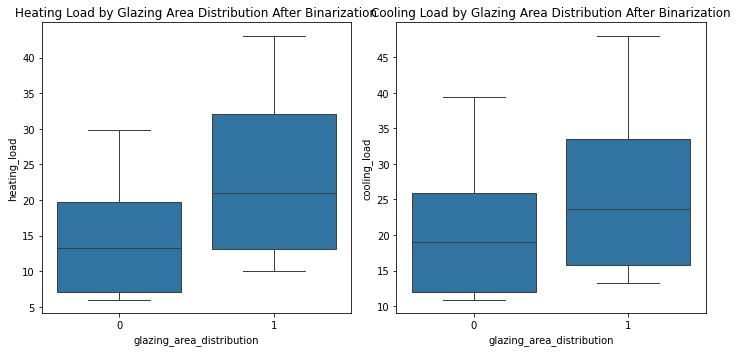

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# check whether glazing_area_distribution has an impact on heating_load
sns.boxplot(data=data, x='glazing_area_distribution', y='heating_load', ax=axes[0])
axes[0].set_title('Heating Load by Glazing Area Distribution After Binarization')

# check whether glazing_area_distribution has an impact on cooling_load
sns.boxplot(data=data, x='glazing_area_distribution', y='cooling_load', ax=axes[1])
axes[1].set_title('Cooling Load by Glazing Area Distribution After Binarization')

plt.tight_layout()
plt.show()

In [17]:
# splitting the dataset into features and targets
y1 = data['heating_load']
y2 = data['cooling_load']
X = data.drop(['heating_load','cooling_load'], axis = 1)

# check features
features = list(X.columns)
features

['relative_compactness',
 'wall_area',
 'roof_area',
 'overall_height',
 'glazing_area',
 'glazing_area_distribution']

## Utilizing ML models

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
seed = 1

In [19]:
# split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size = 0.30, random_state=seed)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size = 0.30, random_state=seed)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# train the model and make predictions for heating_load
lr_heating = LinearRegression()
y1_pred = lr_heating.fit(X_train, y1_train).predict(X_test)

# train the model and make predictions for cooling_load
lr_cooling = LinearRegression()
y2_pred = lr_cooling.fit(X_train, y2_train).predict(X_test)

In [21]:
# check the model performance

# calculate the adjusted R2 score
adjuted_r2_heating = 1 - (1-r2_score(y1_test, y1_pred))*(len(y1_test)-1)/(len(y1_test)-X_test.shape[1]-1)
adjuted_r2_cooling = 1 - (1-r2_score(y2_test, y2_pred))*(len(y2_test)-1)/(len(y2_test)-X_test.shape[1]-1)
print('Heating load model adjusted R2 score: \n', adjuted_r2_heating.round(4))
print('Cooling load model adjusted R2 score: \n', adjuted_r2_cooling.round(4))
print('')

# calculate the MSE
print('MSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred).round(4))
print('MSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred).round(4))
print('')

# calculate the RMSE
print('RMSE of predicting heating load: \n', mean_squared_error(y1_test, y1_pred, squared=False).round(4))
print('RMSE of predicting cooling load: \n', mean_squared_error(y2_test, y2_pred, squared=False).round(4))
print('')

# calculate the MAE
print('MAE of predicting heating load: \n', mean_absolute_error(y1_test, y1_pred).round(4))
print('MAE of predicting cooling load: \n', mean_absolute_error(y2_test, y2_pred).round(4))

Heating load model adjusted R2 score: 
 0.9003
Cooling load model adjusted R2 score: 
 0.8623

MSE of predicting heating load: 
 9.8933
MSE of predicting cooling load: 
 12.2353

RMSE of predicting heating load: 
 3.1454
RMSE of predicting cooling load: 
 3.4979

MAE of predicting heating load: 
 2.3002
MAE of predicting cooling load: 
 2.4978


## Results

For the heating load model, the adjusted R-squared value is 0.9003, and for the cooling load model, it is 0.8623. This means that our models can explain 90.03% and 86.23% of the differences in energy efficiency between different buildings, respectively. These high percentages indicate that the models fit the data well and are reliable for predicting energy efficiency based on six features of a residential building.

The Mean Absolute Error (MAE) for the heating load model is 2.3002, and for the cooling load model, it is 2.4978. This means that, on average, the predicted energy efficiency values will be off by about 2.3 and 2.5 units, respectively. This gives us an idea of the typical prediction error.

The Mean Squared Error (MSE) for the heating load model is 9.8933, and for the cooling load model, it is 12.2353. This number is higher than the MAE because it gives more weight to larger errors. MSE is useful for comparing the performance of different models, as it highlights how consistent the predictions are.

The Root Mean Squared Error (RMSE) for the heating load model is 3.1454, and for the cooling load model, it is 3.4979. RMSE takes the square root of the MSE to bring the error back to the same unit as the target variable (energy efficiency), making it easier to understand. RMSE is still higher than MAE because it also penalizes larger errors.



### After evaluating the performance of the model, I check the feature importance to see which features of a residential building contribute most to the energy efficiency.

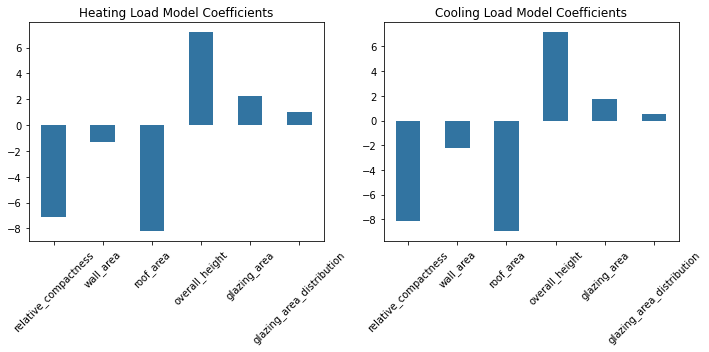

In [22]:
# plot the coefficients of features
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(x=features, y=lr_heating.coef_, width=0.5, ax=axes[0])
axes[0].set_title('Heating Load Model Coefficients')
axes[0].set_xticklabels(labels=features, rotation=45)

sns.barplot(x=features, y=lr_cooling.coef_, width=0.5, ax=axes[1])
axes[1].set_title('Cooling Load Model Coefficients')
axes[1].set_xticklabels(labels=features, rotation=45)

plt.tight_layout()
plt.show()

In [24]:
# check the coefficients and intercepts of the models
print('Heating load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', lr_heating.coef_[i])
print('Heating load model intercept: \n', lr_heating.intercept_)
print('')

print('Cooling load model coefficients:')
for i in range(len(features)):
    print(features[i], ':', lr_cooling.coef_[i])
print('Cooling load model intercept: \n', lr_cooling.intercept_)

Heating load model coefficients:
relative_compactness : -7.095845873047655
wall_area : -1.3159700922227504
roof_area : -8.234793485188431
overall_height : 7.1832665942177165
glazing_area : 2.2416741152751634
glazing_area_distribution : 1.0208046886216962
Heating load model intercept: 
 21.91440595903166

Cooling load model coefficients:
relative_compactness : -8.156114906057063
wall_area : -2.2275143448705865
roof_area : -8.970425365072868
overall_height : 7.131722242939704
glazing_area : 1.7540712278958661
glazing_area_distribution : 0.5130584986980196
Cooling load model intercept: 
 24.170484171322162


## Model selection

In [25]:
from sklearn.linear_model import Ridge, Lasso   
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import LeaveOneOut

In [26]:
# define various models and make a list
models = [LinearRegression(), Ridge(random_state=seed), Lasso(random_state=seed), 
          DecisionTreeRegressor(random_state=seed), RandomForestRegressor(random_state=seed), 
          GradientBoostingRegressor(random_state=seed), AdaBoostRegressor(random_state=seed), 
          KNeighborsRegressor(), SVR()]

In [27]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# define a function using leave-one-out cross validation to evaluate the models
def loo_results(model, X_scaled, y):
    
    loo = LeaveOneOut()
    test_array = np.array([])
    pred_array = np.array([])
    
    for train_index, test_index in loo.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_pred = model.fit(X_train, y_train).predict(X_test)
        test_array = np.append(test_array, y_test)
        pred_array = np.append(pred_array, y_pred)
    
    r2 = r2_score(test_array, pred_array)
    adjusted_r2 = (1 - (1-r2)*(len(test_array)-1)/(len(test_array)-X_scaled.shape[1]-1))
    mse = mean_squared_error(test_array, pred_array)
    rmse = mean_squared_error(test_array, pred_array, squared=False)
    mae = mean_absolute_error(test_array, pred_array)
    
    return adjusted_r2, mse, rmse, mae

In [29]:
# create ataframes to store the results
df_loo_heating = pd.DataFrame(columns=['Model_Heating', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])
df_loo_cooling = pd.DataFrame(columns=['Model_Cooling', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])

for model in models:
    adjuted_r2_heating, mse_heating, rmse_heating, mae_heating = loo_results(model, X_scaled, y1)
    df_loo_heating = pd.concat([df_loo_heating, 
                                pd.DataFrame([[model.__class__.__name__, 
                                               adjuted_r2_heating, mse_heating, mae_heating, rmse_heating]],
                                             columns=['Model_Heating', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])],
                                axis=0)
    adjuted_r2_cooling, mse_cooling, rmse_cooling, mae_cooling = loo_results(model, X_scaled, y2)
    df_loo_cooling = pd.concat([df_loo_cooling,
                                pd.DataFrame([[model.__class__.__name__,
                                               adjuted_r2_cooling, mse_cooling, mae_cooling, rmse_cooling]],
                                             columns=['Model_Cooling', 'LOO_Adj_R2', 'LOO_MSE', 'LOO_RMSE', 'LOO_MAE'])],
                                axis=0)
    
# sort the results by adjusted R2
df_loo_heating = df_loo_heating.sort_values(by='LOO_Adj_R2', ascending=False).reset_index(drop=True)
df_loo_cooling = df_loo_cooling.sort_values(by='LOO_Adj_R2', ascending=False).reset_index(drop=True)

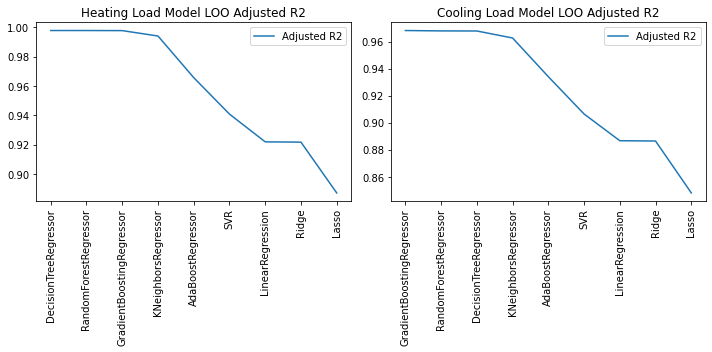

In [30]:
# plot the results of cross validation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_Adj_R2', label='Adjusted R2', ax=ax[0])
ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model LOO Adjusted R2')

sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_Adj_R2', label='Adjusted R2', ax=ax[1])
ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_title('Cooling Load Model LOO Adjusted R2')

plt.tight_layout()
plt.show()

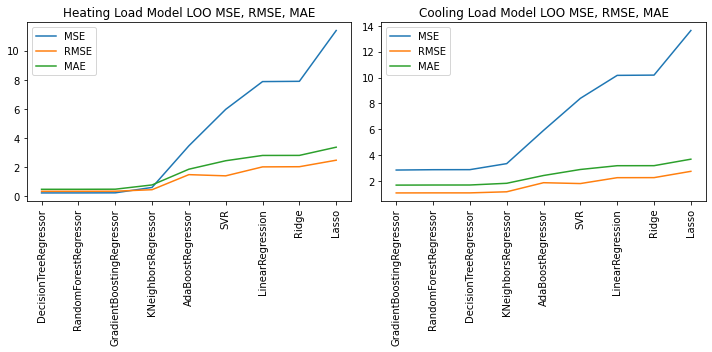

In [31]:
# plot the results of cross validation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_MSE', label='MSE', ax=ax[0])
sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_RMSE', label='RMSE', ax=ax[0])
sns.lineplot(data=df_loo_heating, x='Model_Heating', y='LOO_MAE', label='MAE', ax=ax[0])
ax[0].set_xticklabels(labels=df_loo_heating['Model_Heating'], rotation=90)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model LOO MSE, RMSE, MAE')

sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_MSE', label='MSE', ax=ax[1])
sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_RMSE', label='RMSE', ax=ax[1])
sns.lineplot(data=df_loo_cooling, x='Model_Cooling', y='LOO_MAE', label='MAE', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_loo_cooling['Model_Cooling'], rotation=90)
ax[1].set_title('Cooling Load Model LOO MSE, RMSE, MAE')

plt.tight_layout()
plt.show()

In [32]:
# check the results
print(df_loo_heating.round(4))
print('')
print(df_loo_cooling.round(4))

               Model_Heating LOO_Adj_R2    LOO_MSE  LOO_RMSE   LOO_MAE
0      DecisionTreeRegressor    0.99769   0.233037  0.345713  0.482739
1      RandomForestRegressor   0.997683   0.233699  0.347045  0.483424
2  GradientBoostingRegressor   0.997626   0.239531  0.351389  0.489419
3        KNeighborsRegressor   0.993948   0.610576  0.454382  0.781394
4          AdaBoostRegressor   0.965622   3.468193  1.488897  1.862309
5                        SVR   0.940796   5.972741  1.406764  2.443919
6           LinearRegression   0.921902   7.878819  2.021969  2.806923
7                      Ridge   0.921719   7.897288  2.033041  2.810211
8                      Lasso   0.887142  11.385612  2.480085  3.374257

               Model_Cooling LOO_Adj_R2    LOO_MSE  LOO_RMSE   LOO_MAE
0  GradientBoostingRegressor   0.968178   2.853719  1.085811  1.689295
1      RandomForestRegressor   0.967889   2.879684  1.090444  1.696963
2      DecisionTreeRegressor   0.967838   2.884249  1.089714  1.698308
3    

## Model Validation
Comparing to the linear regression model, Gradient Boosting, Decision Tree, Random Forest and K-Nearest Neighbors have significant improvements in the cross-validation model performance.
Next, I will test these 4 models to see which model performs best on an unseen dataset.

In [33]:
# split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=seed)

# scale the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# define a function to evaluate the models using test data
def model_test(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.fit(X_train, y_train).predict(X_test)
    
    # calculate the evaluation metrics
    r2 = r2_score(y_test, y_pred)
    adjusted_r2 = (1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    
    return adjusted_r2, mse, rmse, mae

In [35]:
# define the models to be tested
models_test = [ DecisionTreeRegressor(random_state=seed), RandomForestRegressor(random_state=seed),
                GradientBoostingRegressor(random_state=seed), KNeighborsRegressor()]

In [36]:
# create dataframes to store the evaluation metrics of models
df_heating_test = pd.DataFrame(columns=['Model_Heating', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])
for model in models_test:
    adjusted_r2, mse, rmse, mae = model_test(model, X_train, y1_train, X_test, y1_test)
    df_heating_test = pd.concat([df_heating_test, 
                                 pd.DataFrame([[model.__class__.__name__, adjusted_r2, mse, rmse, mae]], 
                                              columns=['Model_Heating', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])], 
                                axis=0)
df_heating_test = df_heating_test.sort_values(by='Test_Adj_R2', ascending=False).reset_index(drop=True)


df_cooling_test = pd.DataFrame(columns=['Model_Cooling', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])
for model in models_test:
    adjusted_r2, mse, rmse, mae = model_test(model, X_train, y2_train, X_test, y2_test)
    df_cooling_test = pd.concat([df_cooling_test, 
                                 pd.DataFrame([[model.__class__.__name__, adjusted_r2, mse, rmse, mae]], 
                                              columns=['Model_Cooling', 'Test_Adj_R2', 'Test_MSE', 'Test_RMSE', 'Test_MAE'])], 
                                axis=0)
df_cooling_test = df_cooling_test.sort_values(by='Test_Adj_R2', ascending=False).reset_index(drop=True)

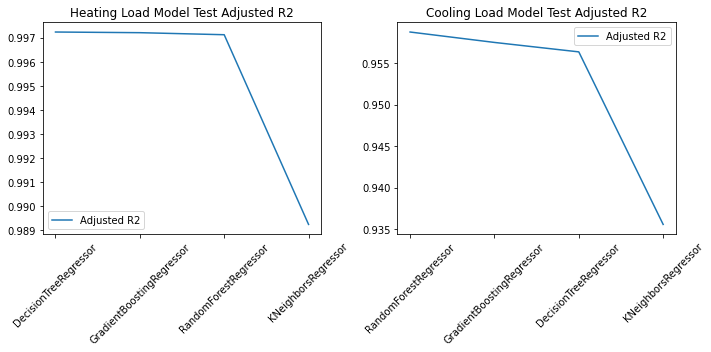

In [37]:
# plot the results of test data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_Adj_R2', label='Adjusted R2', ax=ax[0])
ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Heating Load Model Test Adjusted R2')

sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_Adj_R2', label='Adjusted R2', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)
ax[1].set_title('Cooling Load Model Test Adjusted R2')

plt.tight_layout()
plt.show()

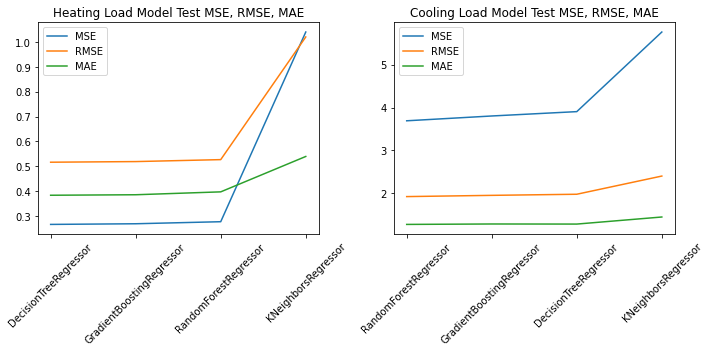

In [38]:
# plot the results of test data
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_MSE', label='MSE', ax=ax[0])
sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_RMSE', label='RMSE', ax=ax[0])
sns.lineplot(data=df_heating_test, x='Model_Heating', y='Test_MAE', label='MAE', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_xticklabels(labels=df_heating_test['Model_Heating'], rotation=45)
ax[0].set_title('Heating Load Model Test MSE, RMSE, MAE')

sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_MSE', label='MSE', ax=ax[1])
sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_RMSE', label='RMSE', ax=ax[1])
sns.lineplot(data=df_cooling_test, x='Model_Cooling', y='Test_MAE', label='MAE', ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=df_cooling_test['Model_Cooling'], rotation=45)
ax[1].set_title('Cooling Load Model Test MSE, RMSE, MAE')

plt.tight_layout()
plt.show()

In [39]:
# check the results of test data
print(f'Heating load model test results: \n{df_heating_test.round(4)}')
print(' ')
print(f'Cooling load model test results: \n{df_cooling_test.round(4)}')

Heating load model test results: 
               Model_Heating Test_Adj_R2  Test_MSE Test_RMSE  Test_MAE
0      DecisionTreeRegressor    0.997236  0.266895  0.516619  0.383991
1  GradientBoostingRegressor    0.997208  0.269542  0.519175  0.386003
2      RandomForestRegressor    0.997123  0.277739   0.52701  0.397586
3        KNeighborsRegressor    0.989235  1.039329  1.019475  0.539681
 
Cooling load model test results: 
               Model_Cooling Test_Adj_R2  Test_MSE Test_RMSE  Test_MAE
0      RandomForestRegressor    0.958734  3.690626    1.9211  1.271768
1  GradientBoostingRegressor     0.95748   3.80278  1.950072  1.281726
2      DecisionTreeRegressor    0.956343  3.904466  1.975972  1.279653
3        KNeighborsRegressor    0.935565  5.762757  2.400574  1.444727


In [43]:
import numpy as np

# Assuming y1, y2, df_heating_test, and df_cooling_test are already defined

# Heating load
heating_load_avg = round(np.mean(y1), 4)
heating_load_error = round(df_heating_test.iloc[0, -1], 4)
heating_load_error_percent = round((df_heating_test.iloc[0, -1] / np.mean(y1) * 100), 4)

print(f'Heating load average value: {heating_load_avg}')
print(f'Heating load model prediction error: {heating_load_error}')
print(f'error %: {heating_load_error_percent}%')
print(' ')

# Cooling load
cooling_load_avg = round(np.mean(y2), 4)
cooling_load_error = round(df_cooling_test.iloc[0, -1], 4)
cooling_load_error_percent = round((df_cooling_test.iloc[0, -1] / np.mean(y2) * 100), 4)

print(f'Cooling load average value: {cooling_load_avg}')
print(f'Cooling load model prediction error: {cooling_load_error}')
print(f'error %: {cooling_load_error_percent}%')

Heating load average value: 22.3072
Heating load model prediction error: 0.384
error %: 1.7214%
 
Cooling load average value: 24.5878
Cooling load model prediction error: 1.2718
error %: 5.1724%


When predicting the heating load, the expected error is 0.3840 unit on average, and when predicting the cooling load, the expected error of is 1.2718 unit on average.
These features of a residential building are more useful in predicting the heating load, with the error percentage of 1.7214%, while when in predicting the cooling load, the error percentage is 5.1724%
Professionals with domain knowledge can determine if the error percentages are within an acceptable range.

In [44]:
# fit the models using the whole dataset
dt_heating = DecisionTreeRegressor(random_state=seed).fit(X, y1)
rf_cooling = RandomForestRegressor(random_state=seed).fit(X, y2)

# extract the feature importance
heating_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': dt_heating.feature_importances_})
cooling_feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_cooling.feature_importances_})

# sort the feature importance in descending order
heating_feature_importance = heating_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)
cooling_feature_importance = cooling_feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop=True)

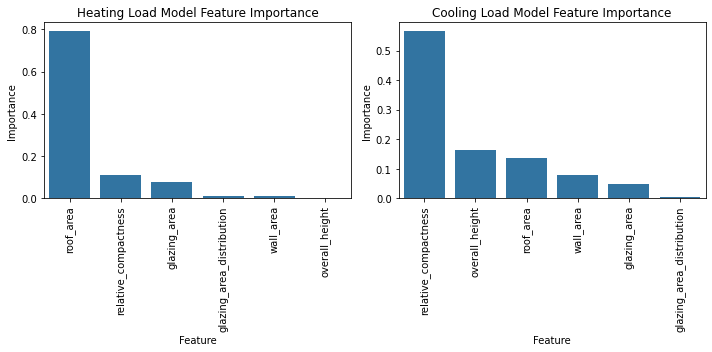

In [45]:
# plot the feature importance
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.barplot(data=heating_feature_importance, x='Feature', y='Importance', ax=ax[0])
ax[0].set_xticklabels(labels=heating_feature_importance['Feature'], rotation=90)
ax[0].set_title('Heating Load Model Feature Importance')

sns.barplot(data=cooling_feature_importance, x='Feature', y='Importance', ax=ax[1])
ax[1].set_xticklabels(labels=cooling_feature_importance['Feature'], rotation=90)
ax[1].set_title('Cooling Load Model Feature Importance')

plt.tight_layout()
plt.show()

In [46]:
# check the feature importance
print(f'Heating load predicting feature importance: \n{heating_feature_importance}')
print('')
print(f'Cooling load predicting feature importance: \n{cooling_feature_importance}')

Heating load predicting feature importance: 
                     Feature  Importance
0                  roof_area    0.792761
1       relative_compactness    0.109028
2               glazing_area    0.078225
3  glazing_area_distribution    0.010173
4                  wall_area    0.009812
5             overall_height    0.000000

Cooling load predicting feature importance: 
                     Feature  Importance
0       relative_compactness    0.567212
1             overall_height    0.164438
2                  roof_area    0.137544
3                  wall_area    0.078453
4               glazing_area    0.048232
5  glazing_area_distribution    0.004120
